# Source of the dataset: Kaggle
[https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?rvi=1]

### Importing the required libraries

In [303]:
import pandas as pd
import ast
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Reading the files

In [304]:
movies = pd.read_csv("tmdb_5000_movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [305]:
credits =pd.read_csv("tmdb_5000_credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### merging datasets having similar column id

In [306]:
credits.columns =['id','title', 'cast', 'crew']
movies= movies.merge(credits,on='id')

In [307]:
movies.shape

(4803, 23)

In [308]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

### Dropping extra columns

In [309]:
movies.drop(columns=["title_y"],inplace=True)

### Renaming the columns

In [310]:
movies.rename(columns= {'title_x':'title'},inplace=True)

In [311]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [312]:
"""
movies1 = movies[['id','title','tagline','overview','genres','cast','crew','runtime','release_date','popularity','production_companies','budget','revenue',
                 'vote_average', 'vote_count']]
"""

"\nmovies1 = movies[['id','title','tagline','overview','genres','cast','crew','runtime','release_date','popularity','production_companies','budget','revenue',\n                 'vote_average', 'vote_count']]\n"

### Making the copy of the dataset

In [313]:
movies_copy = movies.copy()
movies_copy

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_.

In [314]:
movies_copy.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

### Dropping unnecessary columns

In [315]:
movies_copy = movies_copy.drop(['homepage','keywords','original_title','production_countries','spoken_languages','original_language','status'],axis=1)

In [316]:
'''
movies_copy = movies_copy[['id','title','tagline','overview','genres','cast','crew','runtime','release_date','popularity','production_companies','budget','revenue',
                 'vote_average', 'vote_count']]
'''

"\nmovies_copy = movies_copy[['id','title','tagline','overview','genres','cast','crew','runtime','release_date','popularity','production_companies','budget','revenue',\n                 'vote_average', 'vote_count']]\n"

In [317]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Checking for missing values

In [318]:
movies_copy.isnull().sum()

budget                    0
genres                    0
id                        0
overview                  3
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
tagline                 844
title                     0
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

In [319]:
movies_copy

,budget,genres,id,overview,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04,2040920,81.0,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,A newlywed couple's honeymoon is upended by th...,0.642552,[],2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,0,[],126186,When ambitious New York attorney Sam is sent t...,0.857008,[],2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [320]:
movies_copy

,budget,genres,id,overview,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04,2040920,81.0,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,A newlywed couple's honeymoon is upended by th...,0.642552,[],2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,0,[],126186,When ambitious New York attorney Sam is sent t...,0.857008,[],2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


### Defining a function to clean the data

In [321]:
def clean_list_of_dicts(list_str, key_to_keep):
    try:
        list_of_dicts = ast.literal_eval(list_str)
        cleaned_list = [d[key_to_keep] for d in list_of_dicts if key_to_keep in d]
        return ','.join(cleaned_list)
    except ValueError:
        return list_str

In [322]:
# Specify the key you want to keep
key_to_keep = "name"
# Apply the cleaning function using loc to avoid SettingWithCopyWarning
movies_copy.loc[:,"genres"] = movies_copy.loc[0:,"genres"].apply(clean_list_of_dicts,key_to_keep=key_to_keep)
#print(', '.join(movies1["genres"]))

In [323]:
movies_copy["genres"]

0       Action,Adventure,Fantasy,Science Fiction
1                       Adventure,Fantasy,Action
2                         Action,Adventure,Crime
3                    Action,Crime,Drama,Thriller
4               Action,Adventure,Science Fiction
                          ...                   
4798                       Action,Crime,Thriller
4799                              Comedy,Romance
4800               Comedy,Drama,Romance,TV Movie
4801                                            
4802                                 Documentary
Name: genres, Length: 4803, dtype: object

In [324]:
movies_copy

,budget,genres,id,overview,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"Action,Adventure,Fantasy,Science Fiction",19995,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"Adventure,Fantasy,Action",285,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"Action,Adventure,Crime",206647,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"Action,Crime,Drama,Thriller",49026,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"Action,Adventure,Science Fiction",49529,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action,Crime,Thriller",9367,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04,2040920,81.0,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"Comedy,Romance",72766,A newlywed couple's honeymoon is upended by th...,0.642552,[],2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"Comedy,Drama,Romance,TV Movie",231617,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,0,,126186,When ambitious New York attorney Sam is sent t...,0.857008,[],2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [325]:
movies_copy.loc[0:1,"cast"]

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
Name: cast, dtype: object

In [326]:
# Specify the key you want to keep
key_to_keep = "name"
# Apply the cleaning function using loc to avoid SettingWithCopyWarning
movies_copy.loc[:,"cast"] = movies_copy.loc[0:,"cast"].apply(clean_list_of_dicts,key_to_keep=key_to_keep)
#print(', '.join(movies1["genres"]))

In [327]:
movies_copy.loc[0:5,"cast"]

0    Sam Worthington,Zoe Saldana,Sigourney Weaver,S...
1    Johnny Depp,Orlando Bloom,Keira Knightley,Stel...
2    Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...
3    Christian Bale,Michael Caine,Gary Oldman,Anne ...
4    Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...
5    Tobey Maguire,Kirsten Dunst,James Franco,Thoma...
Name: cast, dtype: object

In [328]:
movies_copy.loc[0,"crew"]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [329]:
movies_copy["production_companies"][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [330]:
# Specify the key you want to keep
key_to_keep = "name"
# Apply the cleaning function using loc to avoid SettingWithCopyWarning
movies_copy.loc[:,"production_companies"] = movies_copy.loc[0:,"production_companies"].apply(clean_list_of_dicts,key_to_keep=key_to_keep)
#print(', '.join(movies1["genres"]))

In [331]:
movies_copy.loc[0:4,"production_companies"]

0    Ingenious Film Partners,Twentieth Century Fox ...
1    Walt Disney Pictures,Jerry Bruckheimer Films,S...
2                         Columbia Pictures,Danjaq,B24
3    Legendary Pictures,Warner Bros.,DC Entertainme...
4                                 Walt Disney Pictures
Name: production_companies, dtype: object

In [332]:
movies_copy[["genres","cast","production_companies"]]

,genres,cast,production_companies
0,"Action,Adventure,Fantasy,Science Fiction","Sam Worthington,Zoe Saldana,Sigourney Weaver,S...","Ingenious Film Partners,Twentieth Century Fox ..."
1,"Adventure,Fantasy,Action","Johnny Depp,Orlando Bloom,Keira Knightley,Stel...","Walt Disney Pictures,Jerry Bruckheimer Films,S..."
2,"Action,Adventure,Crime","Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...","Columbia Pictures,Danjaq,B24"
3,"Action,Crime,Drama,Thriller","Christian Bale,Michael Caine,Gary Oldman,Anne ...","Legendary Pictures,Warner Bros.,DC Entertainme..."
4,"Action,Adventure,Science Fiction","Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Walt Disney Pictures
...,...,...,...
4798,"Action,Crime,Thriller","Carlos Gallardo,Jaime de Hoyos,Peter Marquardt...",Columbia Pictures
4799,"Comedy,Romance","Edward Burns,Kerry Bishé,Marsha Dietlein,Caitl...",
4800,"Comedy,Drama,Romance,TV Movie","Eric Mabius,Kristin Booth,Crystal Lowe,Geoff G...","Front Street Pictures,Muse Entertainment Enter..."
4801,,"Daniel Henney,Eliza Coupe,Bill Paxton,Alan Ruc...",


In [333]:
movies_copy["genres"].value_counts()

Drama                                      370
Comedy                                     282
Drama,Romance                              164
Comedy,Romance                             144
Comedy,Drama                               142
                                          ... 
Adventure,Action,Comedy,Romance              1
Action,Fantasy,Science Fiction,Thriller      1
Science Fiction,Comedy,Adventure             1
Drama,Thriller,Horror                        1
Comedy,Drama,Romance,TV Movie                1
Name: genres, Length: 1175, dtype: int64

In [334]:
movies_copy.columns

Index(['budget', 'genres', 'id', 'overview', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime', 'tagline',
       'title', 'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [335]:
movies_copy["budget"].value_counts()

0           1037
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
13200000       1
14350531       1
3100000        1
12800000       1
9000           1
Name: budget, Length: 436, dtype: int64

In [336]:
budget= movies_copy["budget"]==0
movies_copy.loc[budget,["title","budget"]].head(10)

,title,budget
265,The Cat in the Hat,0
321,The Campaign,0
359,Alvin and the Chipmunks: The Road Chip,0
406,Arthur Christmas,0
409,All That Jazz,0
453,The Pink Panther,0
463,Déjà Vu,0
474,Evolution,0
475,The Edge,0
489,Oceans,0


In [337]:
movies_copy["budget"]

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4798       220000
4799         9000
4800            0
4801            0
4802            0
Name: budget, Length: 4803, dtype: int64

In [338]:
movies_copy.isnull().sum()

budget                    0
genres                    0
id                        0
overview                  3
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
tagline                 844
title                     0
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

<Axes: >

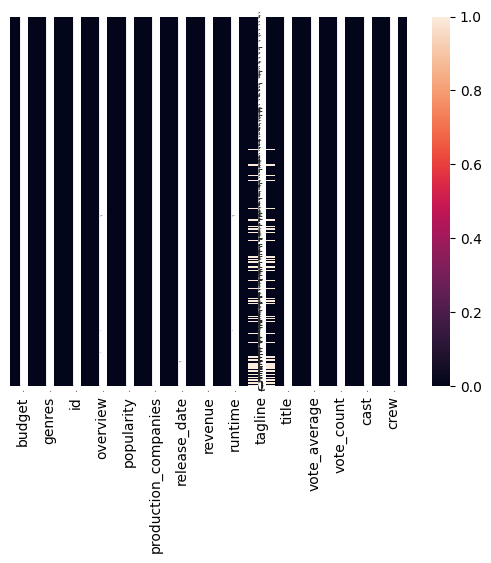

In [339]:
sns.heatmap(movies_copy.isnull(), yticklabels=False,annot=True)

In [340]:
movies_copy.dtypes

budget                    int64
genres                   object
id                        int64
overview                 object
popularity              float64
production_companies     object
release_date             object
revenue                   int64
runtime                 float64
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

In [341]:
movies_copy["runtime"]

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4803, dtype: float64

In [342]:
movies_copy["revenue"].value_counts()

0            1427
7000000         6
8000000         6
6000000         5
12000000        5
             ... 
124827316       1
75505856        1
124731534       1
158733820       1
2040920         1
Name: revenue, Length: 3297, dtype: int64

In [343]:
budget= (movies_copy["budget"]==0) & (movies_copy["revenue"]==0)
movies_copy.loc[budget,["title","budget","revenue"]].head(20)

,title,budget,revenue
265,The Cat in the Hat,0,0
406,Arthur Christmas,0,0
453,The Pink Panther,0,0
463,Déjà Vu,0,0
474,Evolution,0,0
584,Wolf,0,0
601,Rollerball,0,0
721,Kangaroo Jack,0,0
735,The Tuxedo,0,0
745,Miss Congeniality 2: Armed and Fabulous,0,0


In [344]:

movies_copy[["title","vote_average","vote_count","popularity"]].head(10)

,title,vote_average,vote_count,popularity
0,Avatar,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End,6.9,4500,139.082615
2,Spectre,6.3,4466,107.376788
3,The Dark Knight Rises,7.6,9106,112.312950
4,John Carter,6.1,2124,43.926995
5,Spider-Man 3,5.9,3576,115.699814
6,Tangled,7.4,3330,48.681969
7,Avengers: Age of Ultron,7.3,6767,134.279229
8,Harry Potter and the Half-Blood Prince,7.4,5293,98.885637
9,Batman v Superman: Dawn of Justice,5.7,7004,155.790452


### Imputing the 0 values with NaN

In [345]:
movies_copy.loc[:,"budget"] = movies_copy.loc[:,"budget"].replace(0,np.nan)
movies_copy.loc[:,"revenue"]= movies_copy.loc[:,"revenue"].replace(0,np.nan)

In [346]:
movies_copy["budget"].value_counts()

20000000.0    144
30000000.0    128
25000000.0    126
40000000.0    123
15000000.0    120
             ... 
13200000.0      1
14350531.0      1
3100000.0       1
12800000.0      1
9000.0          1
Name: budget, Length: 435, dtype: int64

In [347]:
movies_copy["revenue"].value_counts()

8000000.0      6
7000000.0      6
6000000.0      5
100000000.0    5
10000000.0     5
              ..
124827316.0    1
75505856.0     1
124731534.0    1
158733820.0    1
2040920.0      1
Name: revenue, Length: 3296, dtype: int64

In [348]:
movies["budget"].value_counts()

0           1037
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
13200000       1
14350531       1
3100000        1
12800000       1
9000           1
Name: budget, Length: 436, dtype: int64

In [349]:
movies["revenue"].value_counts()

0            1427
7000000         6
8000000         6
6000000         5
12000000        5
             ... 
124827316       1
75505856        1
124731534       1
158733820       1
2040920         1
Name: revenue, Length: 3297, dtype: int64

In [350]:
movies_copy["release_date"]

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [351]:
# converting it to datetime datatype
movies_copy["release_date"] = pd.to_datetime(movies_copy["release_date"])
movies_copy["release_date"]

0      2009-12-10
1      2007-05-19
2      2015-10-26
3      2012-07-16
4      2012-03-07
          ...    
4798   1992-09-04
4799   2011-12-26
4800   2013-10-13
4801   2012-05-03
4802   2005-08-05
Name: release_date, Length: 4803, dtype: datetime64[ns]

### changing the format (day/month/year)

In [352]:
movies_copy["release_date"] = movies_copy["release_date"].dt.strftime('%d-%m-%Y')

In [353]:
movies_copy["release_date"].head(10)

0    10-12-2009
1    19-05-2007
2    26-10-2015
3    16-07-2012
4    07-03-2012
5    01-05-2007
6    24-11-2010
7    22-04-2015
8    07-07-2009
9    23-03-2016
Name: release_date, dtype: object

In [354]:
movies_copy["runtime"]

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4803, dtype: float64

In [355]:
filter = movies_copy["runtime"].isnull()
movies_copy.loc[filter,["title","runtime","genres"]]

,title,runtime,genres
2656,Chiamatemi Francesco - Il Papa della gente,NaN,Drama
4140,"To Be Frank, Sinatra at 100",NaN,Documentary


### Dropping rows with that have NaN

In [356]:
movies_copy.drop(labels=[2656,4140],axis=0,inplace=True)

In [357]:
drama =movies_copy["genres"]=="Drama"
movies_copy.loc[drama,["genres","runtime"]]

,genres,runtime
192,Drama,165.0
214,Drama,130.0
250,Drama,170.0
264,Drama,157.0
357,Drama,125.0
...,...,...
4777,Drama,78.0
4785,Drama,60.0
4789,Drama,111.0
4793,Drama,90.0


In [358]:
'''
def convert_to_hrs(number):
    # Split the float into hours and minutes
    hour, minute = divmod(number * 60, 60)
    return f"{int(hour):02d}:{int(minute):02d}"
'''
'''
movies_copy["Duration_hrs"] =movies_copy["runtime"].apply(convert_to_hrs)
movies_copy["Duration_hrs"]
'''

'\nmovies_copy["Duration_hrs"] =movies_copy["runtime"].apply(convert_to_hrs)\nmovies_copy["Duration_hrs"]\n'

In [359]:
filt = movies_copy["release_date"]>='2015'
movies_copy.loc[filt,"release_date"].head(20)

2     26-10-2015
6     24-11-2010
7     22-04-2015
9     23-03-2016
10    28-06-2006
11    30-10-2008
16    25-04-2012
18    23-05-2012
20    27-06-2012
26    27-04-2016
29    25-10-2012
30    25-06-2004
33    24-05-2006
36    25-06-2014
48    27-02-2013
52    28-06-2011
53    21-05-2008
55    21-06-2012
57    22-06-2008
62    29-06-2016
Name: release_date, dtype: object

In [360]:
list =['id','title','tagline','overview','genres','cast','crew','runtime','release_date','popularity','production_companies','budget','revenue',
                 'vote_average', 'vote_count']

In [361]:
movies_copy[list]

,id,title,tagline,overview,genres,cast,crew,runtime,release_date,popularity,production_companies,budget,revenue,vote_average,vote_count
0,19995,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","Action,Adventure,Fantasy,Science Fiction","Sam Worthington,Zoe Saldana,Sigourney Weaver,S...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",162.0,10-12-2009,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",237000000.0,2.787965e+09,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","Adventure,Fantasy,Action","Johnny Depp,Orlando Bloom,Keira Knightley,Stel...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",169.0,19-05-2007,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",300000000.0,9.610000e+08,6.9,4500
2,206647,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"Action,Adventure,Crime","Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",148.0,26-10-2015,107.376788,"Columbia Pictures,Danjaq,B24",245000000.0,8.806746e+08,6.3,4466
3,49026,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"Action,Crime,Drama,Thriller","Christian Bale,Michael Caine,Gary Oldman,Anne ...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",165.0,16-07-2012,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",250000000.0,1.084939e+09,7.6,9106
4,49529,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","Action,Adventure,Science Fiction","Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",132.0,07-03-2012,43.926995,Walt Disney Pictures,260000000.0,2.841391e+08,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"He didn't come looking for trouble, but troubl...",El Mariachi just wants to play his guitar and ...,"Action,Crime,Thriller","Carlos Gallardo,Jaime de Hoyos,Peter Marquardt...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",81.0,04-09-1992,14.269792,Columbia Pictures,220000.0,2.040920e+06,6.6,238
4799,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,"Comedy,Romance","Edward Burns,Kerry Bishé,Marsha Dietlein,Caitl...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",85.0,26-12-2011,0.642552,,9000.0,NaN,5.9,5
4800,231617,"Signed, Sealed, Delivered",NaN,"""Signed, Sealed, Delivered"" introduces a dedic...","Comedy,Drama,Romance,TV Movie","Eric Mabius,Kristin Booth,Crystal Lowe,Geoff G...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",120.0,13-10-2013,1.444476,"Front Street Pictures,Muse Entertainment Enter...",NaN,NaN,7.0,6
4801,126186,Shanghai Calling,A New Yorker in Shanghai,When ambitious New York attorney Sam is sent t...,,"Daniel Henney,Eliza Coupe,Bill Paxton,Alan Ruc...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",98.0,03-05-2012,0.857008,,NaN,NaN,5.7,7


In [1]:
#movies_copy["crew"][0]

In [363]:
'''
def list_of_dicts_two_keys(list_str, keys_to_keep):
    try:
        list_of_dicts = ast.literal_eval(list_str)
        cleaned_list = [{key: d[key] for key in keys_to_keep if key in d} for d in list_of_dicts]
        return str(cleaned_list)
    except ValueError:
        return list_str  # Return the original string if unable to parse
'''

'\ndef list_of_dicts_two_keys(list_str, keys_to_keep):\n    try:\n        list_of_dicts = ast.literal_eval(list_str)\n        cleaned_list = [{key: d[key] for key in keys_to_keep if key in d} for d in list_of_dicts]\n        return str(cleaned_list)\n    except ValueError:\n        return list_str  # Return the original string if unable to parse\n'

In [364]:
'''
# Specify the key you want to keep
keys_to_keep ="job"
# Apply the cleaning function using loc to avoid SettingWithCopyWarning
movies_copy.loc[:,"crew"] = movies_copy.loc[0:,"crew"].apply(list_of_dicts_two_keys, keys_to_keep=keys_to_keep)
#print(', '.join(movies1["genres"]))
'''

'\n# Specify the key you want to keep\nkeys_to_keep ="job"\n# Apply the cleaning function using loc to avoid SettingWithCopyWarning\nmovies_copy.loc[:,"crew"] = movies_copy.loc[0:,"crew"].apply(list_of_dicts_two_keys, keys_to_keep=keys_to_keep)\n#print(\', \'.join(movies1["genres"]))\n'

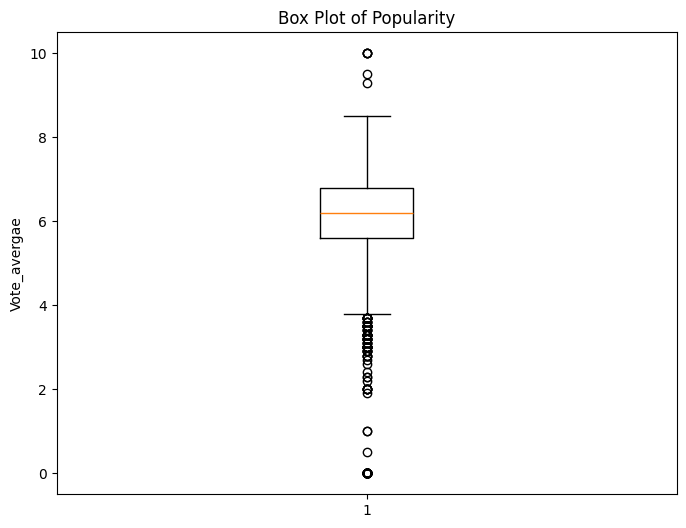

In [366]:
plt.figure(figsize=(8, 6))
plt.boxplot(movies_copy['vote_average'])
plt.title('Box Plot of Popularity')
plt.ylabel('Vote_avergae')
plt.show()



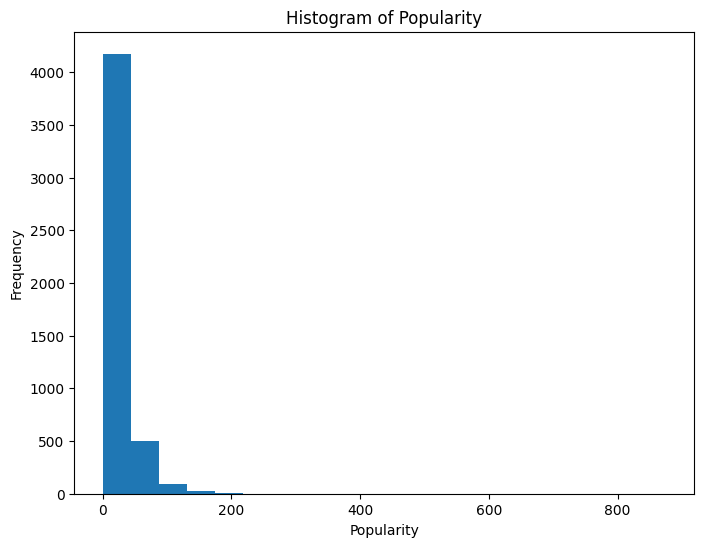

In [367]:
# Create a histogram of 'popularity'
plt.figure(figsize=(8, 6))
plt.hist(movies_copy['popularity'], bins=20)
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [368]:
movies_copy

,budget,genres,id,overview,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count,cast,crew
0,237000000.0,"Action,Adventure,Fantasy,Science Fiction",19995,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",10-12-2009,2.787965e+09,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,"Adventure,Fantasy,Action",285,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",19-05-2007,9.610000e+08,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,"Action,Adventure,Crime",206647,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24",26-10-2015,8.806746e+08,148.0,A Plan No One Escapes,Spectre,6.3,4466,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000.0,"Action,Crime,Drama,Thriller",49026,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",16-07-2012,1.084939e+09,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"Christian Bale,Michael Caine,Gary Oldman,Anne ...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000.0,"Action,Adventure,Science Fiction",49529,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,07-03-2012,2.841391e+08,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000.0,"Action,Crime,Thriller",9367,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,04-09-1992,2.040920e+06,81.0,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"Carlos Gallardo,Jaime de Hoyos,Peter Marquardt...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000.0,"Comedy,Romance",72766,A newlywed couple's honeymoon is upended by th...,0.642552,,26-12-2011,NaN,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"Edward Burns,Kerry Bishé,Marsha Dietlein,Caitl...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,NaN,"Comedy,Drama,Romance,TV Movie",231617,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"Front Street Pictures,Muse Entertainment Enter...",13-10-2013,NaN,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"Eric Mabius,Kristin Booth,Crystal Lowe,Geoff G...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,NaN,,126186,When ambitious New York attorney Sam is sent t...,0.857008,,03-05-2012,NaN,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,"Daniel Henney,Eliza Coupe,Bill Paxton,Alan Ruc...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [369]:
mean_budget = movies_copy['budget'].mean()
movies_copy['budget'].fillna(mean_budget, inplace=True)

In [370]:
movies_copy

,budget,genres,id,overview,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count,cast,crew
0,2.370000e+08,"Action,Adventure,Fantasy,Science Fiction",19995,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",10-12-2009,2.787965e+09,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,3.000000e+08,"Adventure,Fantasy,Action",285,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",19-05-2007,9.610000e+08,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,2.450000e+08,"Action,Adventure,Crime",206647,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24",26-10-2015,8.806746e+08,148.0,A Plan No One Escapes,Spectre,6.3,4466,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,2.500000e+08,"Action,Crime,Drama,Thriller",49026,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",16-07-2012,1.084939e+09,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"Christian Bale,Michael Caine,Gary Oldman,Anne ...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,2.600000e+08,"Action,Adventure,Science Fiction",49529,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,07-03-2012,2.841391e+08,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,2.200000e+05,"Action,Crime,Thriller",9367,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,04-09-1992,2.040920e+06,81.0,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"Carlos Gallardo,Jaime de Hoyos,Peter Marquardt...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9.000000e+03,"Comedy,Romance",72766,A newlywed couple's honeymoon is upended by th...,0.642552,,26-12-2011,NaN,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"Edward Burns,Kerry Bishé,Marsha Dietlein,Caitl...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,3.705854e+07,"Comedy,Drama,Romance,TV Movie",231617,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"Front Street Pictures,Muse Entertainment Enter...",13-10-2013,NaN,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"Eric Mabius,Kristin Booth,Crystal Lowe,Geoff G...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,3.705854e+07,,126186,When ambitious New York attorney Sam is sent t...,0.857008,,03-05-2012,NaN,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,"Daniel Henney,Eliza Coupe,Bill Paxton,Alan Ruc...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [372]:
movies_copy["budget"]

0       2.370000e+08
1       3.000000e+08
2       2.450000e+08
3       2.500000e+08
4       2.600000e+08
            ...     
4798    2.200000e+05
4799    9.000000e+03
4800    3.705854e+07
4801    3.705854e+07
4802    3.705854e+07
Name: budget, Length: 4801, dtype: float64

In [374]:
C= movies_copy['vote_average'].mean()
C

6.093188918975214

In [376]:
m= movies_copy['vote_count'].quantile(0.9)
m

1840.0

In [381]:
q_movies = movies_copy.loc[movies_copy['vote_count'] >= m]
q_movies.shape

(481, 15)

In [382]:
q_movies.loc[:,'score'] = q_movies.apply(weighted_rating, axis=1)

C:\Users\ketak\AppData\Local\Temp\ipykernel_4208\900187597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies.loc[:,'score'] = q_movies.apply(weighted_rating, axis=1)


In [383]:
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059131
662,Fight Club,9413,8.3,7.939160
65,The Dark Knight,12002,8.2,7.919944
3232,Pulp Fiction,8428,8.3,7.904545
96,Inception,13752,8.1,7.863178
3337,The Godfather,5893,8.4,7.851114
95,Interstellar,10867,8.1,7.809410
809,Forrest Gump,7927,8.2,7.803099
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727168
1990,The Empire Strikes Back,5879,8.2,7.697793


Text(0.5, 1.0, 'Popular Movies')

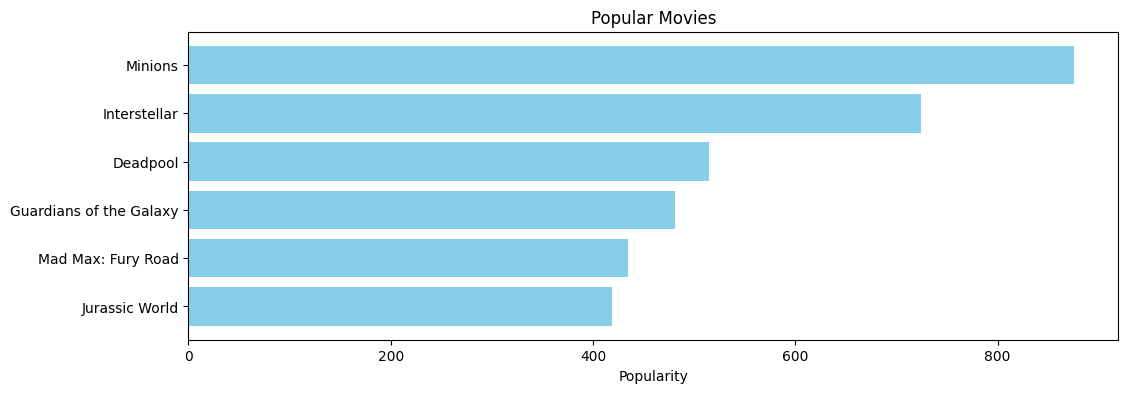

In [385]:
pop= movies_copy.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")